## LightGBM (Gradient Boosting Machine)

- Multivariate
- A gradient boosting ensemble method that is used by the train using AutoML tool and is based on decision trees. As with other decision tree-based methods, LightGBM can be used for both classification and regression. LightGBM is optimized for high performance with distributed systems.
- Gradient Boosting Machine: a powerful ensemble machine learning algorithm that uses decision trees. Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models.

In [1]:
from darts import TimeSeries
from darts.models import LightGBMModel
from darts.utils.statistics import plot_hist
from darts.metrics import mape
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../../data/prepared/df_energy_climate_2020.csv')

In [3]:
df = df.drop(['date', 'day_of_week', 'time', 'month'], axis=1)

In [4]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, time_col="datetime", value_cols='energy_price')

splitting_point = (int(len(series)*0.20))

# Set aside the second half of series as a validation series
train, val = series[:-splitting_point], series[-splitting_point:]
# train, val = series.split_before(0.75)

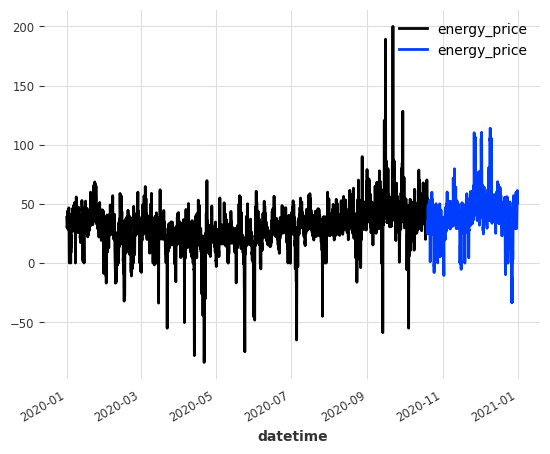

In [5]:
train.plot()
val.plot()

In [6]:
model = LightGBMModel(    
    lags=[-168, -1],
    output_chunk_length=168
)

In [7]:
model.fit(train)

forecast = model.predict(len(val))
print(f'model {model} obtains MAPE: {mape(val, forecast):.2f}%')

model LGBModel(lags={'target': [-168, -1]}) obtains MAPE: 1198.27%


## Historical forecasts
Forecasting using historical data.

*Backtesting: General method for seeing how well a model would have done using historical data.

In [8]:
historical_fcast = model.historical_forecasts(
    series,
    start=0.9,
    forecast_horizon=168,
    stride=5,
    overlap_end=False,
    verbose=True
)

  0%|          | 0/143 [00:00<?, ?it/s]

KeyboardInterrupt: 

ValueError: Inferred frequency None from passed values does not conform to passed frequency H

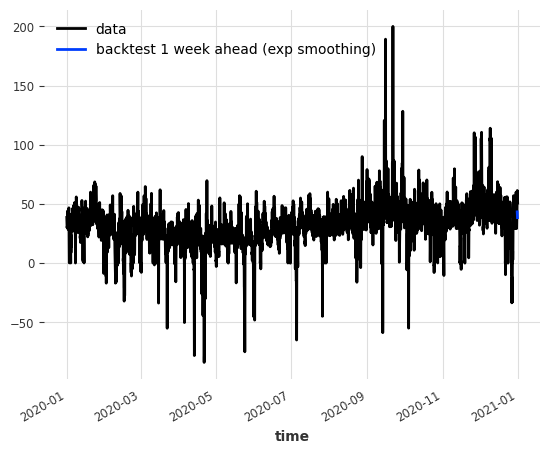

In [ ]:
series.plot(label='data')
historical_fcast.plot(label='backtest 1 week ahead (lightGBM)')
print(f'MAPE = {mape(historical_fcast, series):.2f}%')

## Backtest
It repeatedly builds a training set from the beginning of series. It trains the current model on the training set, emits a forecast of length equal to forecast_horizon, and then moves the end of the training set forward by stride time steps.

In [ ]:
raw_errors = model.backtest(
    series,
    start=0.98,
    forecast_horizon=168,
    stride=5,
    reduction=None,
    metric=mape,
    verbose=True
)

  0%|          | 0/143 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title='individual backtest error scores (histogram)'
)

: 